<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/quotation_kim/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

word2vec 원리 이해하기

In [115]:
import numpy as np
import pandas as pd

In [116]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
doc = 'you will never know until you try'
token_list = word_tokenize(doc)
tokens = list(set(token_list))
tokens

['never', 'will', 'know', 'try', 'you', 'until']

In [118]:
onehot=np.identity(len(tokens)).tolist()

onehot_vector = []
for vec in onehot:
    onehot_vector.append([vec])
onehot_vector

[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]]

In [119]:
dic = dict(zip(tokens, onehot_vector))
dic

{'know': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 'never': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 'try': [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
 'until': [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]],
 'will': [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 'you': [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]}

In [120]:
y = []
for token in token_list:
    for word in dic.keys(): #토큰과 단어가 일치하면 토큰의 원핫벡터를 리스트에 추가
        if token == word:
            y.append(dic[word])
y

[[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]],
 [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]]

In [121]:
df = pd.DataFrame(y, columns=['onehot'], index=token_list)
df

,onehot
you,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
will,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
never,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
know,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
until,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
you,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
try,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [122]:
y_new = []
for i in y:
    y_new.append(sum(i,[]))
y_new

[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

In [123]:
win_size = 1
x = []

for i in range(len(y)):
    tmp = []
    if i-win_size < 0 : # i가 윈도우사이즈보다 작으면 작은만큼 앞이 잘림
        tmp = y[:i]+y[(i+1):(i+win_size+1)]
    elif i+win_size >= len(y) :    # i가 윈도우사이즈보다 크면 큰만큼 뒤가 잘림
        tmp = y[(i-win_size):i] + y[(i+1):]
    else:
        tmp = y[(i-win_size):i] + y[(i+1):(i+win_size+1)]
    x.append(tmp)
x

[[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]],
 [[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]],
 [[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]],
 [[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]],
 [[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]],
 [[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]], [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]],
 [[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]]]

In [124]:
# x를 np.array화
x_new = []
for i in x:
    x_new.append(np.array(sum(i,[])))
x_new

[array([[0., 1., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.]]), array([[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]]), array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.]]), array([[0., 0., 0., 0., 1., 0.]])]

In [125]:
# hidden layer 계산
vector_dim = 4
w1 = np.random.rand(len(tokens),vector_dim)
w2 = np.random.rand(vector_dim, len(tokens))

h = []
for x_vecs in x_new:
    tmp = []
    for x_vector in x_vecs:
        tmp.append(np.dot(w1.T,x_vector.T))
    h.append(tmp)
h

[[array([0.45274575, 0.56122419, 0.14812291, 0.23740061])],
 [array([0.33906051, 0.9010767 , 0.62909874, 0.42664358]),
  array([0.66654539, 0.34134538, 0.39562594, 0.6381709 ])],
 [array([0.45274575, 0.56122419, 0.14812291, 0.23740061]),
  array([0.59896968, 0.17239121, 0.54223272, 0.61761344])],
 [array([0.66654539, 0.34134538, 0.39562594, 0.6381709 ]),
  array([0.18465778, 0.49753609, 0.50057354, 0.35342954])],
 [array([0.59896968, 0.17239121, 0.54223272, 0.61761344]),
  array([0.33906051, 0.9010767 , 0.62909874, 0.42664358])],
 [array([0.18465778, 0.49753609, 0.50057354, 0.35342954]),
  array([0.123453  , 0.85285804, 0.47962568, 0.67902431])],
 [array([0.33906051, 0.9010767 , 0.62909874, 0.42664358])]]

In [126]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [127]:
# 예상치 계산
y_hat = []
for h_vecs in h:
    tmp = []
    for h_vector in h_vecs:
        tmp.append(softmax(np.dot(w2.T,h_vector)))
    y_hat.append(tmp)
y_hat

[[array([0.15616726, 0.14174948, 0.24990151, 0.14574868, 0.1698522 ,
         0.13658088])],
 [array([0.16904399, 0.14030577, 0.27040503, 0.1227962 , 0.18146269,
         0.11598632]),
  array([0.16161957, 0.15746533, 0.22102392, 0.16682636, 0.18252905,
         0.11053576])],
 [array([0.15616726, 0.14174948, 0.24990151, 0.14574868, 0.1698522 ,
         0.13658088]),
  array([0.16947302, 0.17188375, 0.19513416, 0.17121485, 0.1870263 ,
         0.10526793])],
 [array([0.16161957, 0.15746533, 0.22102392, 0.16682636, 0.18252905,
         0.11053576]),
  array([0.17500994, 0.15792035, 0.21403777, 0.14228385, 0.1821776 ,
         0.12857049])],
 [array([0.16947302, 0.17188375, 0.19513416, 0.17121485, 0.1870263 ,
         0.10526793]),
  array([0.16904399, 0.14030577, 0.27040503, 0.1227962 , 0.18146269,
         0.11598632])],
 [array([0.17500994, 0.15792035, 0.21403777, 0.14228385, 0.1821776 ,
         0.12857049]),
  array([0.1701825 , 0.13796569, 0.24421902, 0.13275209, 0.18281473,
      

In [128]:
# loss 계산
L = []
for predict in y_hat:
    tmp = []
    for j in range(len(predict)):
        tmp.append(np.log(predict[j]) * y[j])
    L.append(np.sum(tmp))
loss = -np.sum(L)
loss

21.43902167640728

In [129]:
# w 업데이트
alpha = 0.01
diff = []
h_layer = []
x_layer = []

for i in range(len(y_new)):
    for j in range(len(y_hat[i])):
        diff.append(y_hat[i][j] - y_new[i])
        h_layer.append(h[i][j])
        x_layer.append(x[i][j])

a = np.dot(np.array(x_layer).T, np.dot(w2, np.array(diff).T).T)
b = []
for i in range(len(a)):
    b.append(a[i][0])

w2 = w2 - alpha*np.dot(np.array(h_layer).T, np.array(diff))
w1 = w1 - b

np.array(w1), np.array(w2)

(array([[ 0.91478098,  0.56672172,  0.53022354,  0.4660616 ],
        [ 0.28454385,  0.39813338,  0.51971476,  0.31037707],
        [ 0.10454438,  0.20092734,  0.29065814,  0.53902068],
        [ 0.10266551,  0.78650741,  0.63056671,  0.75630666],
        [-0.02807915,  0.14282291,  0.2790181 ,  0.55061137],
        [ 0.47292777,  0.99606874,  0.55406495,  0.30606532]]),
 array([[0.33992524, 0.44474211, 0.76847252, 0.5426279 , 0.45680017,
         0.12278699],
        [0.31031828, 0.06659569, 0.91662903, 0.02991251, 0.35370157,
         0.43792978],
        [0.79090948, 0.82422954, 0.50370991, 0.44219822, 0.74117705,
         0.17449287],
        [0.73297709, 0.70150824, 0.61865649, 0.92950003, 0.81670391,
         0.69249971]]))

함수화해서 epoch 주기

In [153]:
def loss(y_hat,y):
    L = []
    for i, predict in enumerate(y_hat):
        tmp = []
        for j in range(len(predict)):
            tmp.append(np.log(predict[j]) * y[i])
        L.append(np.sum(tmp))
    loss_result = -np.sum(L)
    return loss_result

In [158]:
def w_update(learning_rate,y_hat,y,w1,w2):

    diff = []
    h_layer = []
    x_layer = []

    y_new = []
    for i in y:
        y_new.append(sum(i,[]))

    for i in range(len(y_new)):
        for j in range(len(y_hat[i])):
            diff.append(y_hat[i][j] - y_new[i])
            h_layer.append(h[i][j])
            x_layer.append(x[i][j])

    a = np.dot(np.array(x_layer).T, np.dot(w2, np.array(diff).T).T)
    b = []
    for i in range(len(a)):
        b.append(a[i][0])
    c = np.dot(np.array(h_layer).T, np.array(diff))

    w2 -= learning_rate * c
    w1 -= b
    return w1, w2

In [132]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [159]:
doc = 'you will never know until you try'
token_list = word_tokenize(doc)
tokens = list(set(token_list))

onehot=np.identity(len(tokens)).tolist()
onehot_vector = []
for vec in onehot:
    onehot_vector.append([vec])

dic = dict(zip(tokens, onehot_vector))

y = []
for token in token_list:
    for word in dic.keys(): #토큰과 단어가 일치하면 토큰의 원핫벡터를 리스트에 추가
        if token == word:
            y.append(dic[word])

y_new = []
for i in y:
    y_new.append(sum(i,[]))

win_size = 1
x = []

for i in range(len(y)):
    tmp = []
    if i-win_size < 0 : # i가 윈도우사이즈보다 작으면 작은만큼 앞이 잘림
        tmp = y[:i]+y[(i+1):(i+win_size+1)]
    elif i+win_size >= len(y) :    # i가 윈도우사이즈보다 크면 큰만큼 뒤가 잘림
        tmp = y[(i-win_size):i] + y[(i+1):]
    else:
        tmp = y[(i-win_size):i] + y[(i+1):(i+win_size+1)]
    x.append(tmp)

x_new = []
for i in x:
    x_new.append(np.array(sum(i,[])))

vector_dim = 4
w1 = np.random.rand(len(tokens),vector_dim)
w2 = np.random.rand(vector_dim, len(tokens))

h = []
for x_vecs in x_new:
    tmp = []
    for x_vector in x_vecs:
        tmp.append(np.dot(w1.T,x_vector.T))
    h.append(tmp)

y_hat = []
for h_vecs in h:
    tmp = []
    for h_vector in h_vecs:
        tmp.append(softmax(np.dot(w2.T,h_vector)))
    y_hat.append(tmp)

loss_history = []
cnt_history = []
cnt = 0
for i in range(10000):
    w_update(0.01,y_hat,y,w1,w2)

    h = []
    for x_vecs in x_new:
        tmp = []
        for x_vector in x_vecs:
            tmp.append(np.dot(w1.T,x_vector.T))
        h.append(tmp)

    y_hat = []
    for h_vecs in h:
        tmp = []
        for h_vector in h_vecs:
            tmp.append(softmax(np.dot(w2.T,h_vector)))
        y_hat.append(tmp)
    
    loss(y_hat,y)
    loss_history.append(loss(y_hat,y))

    cnt += 1
    cnt_history.append(cnt)


    if i%1000 == 0:
        print('로스:{}, 예측값:{}'.format(loss(y_hat,y), y_hat))
        # print(w1,w2)

로스:19.47786134349927, 예측값:[[array([0.16772775, 0.19680636, 0.13636302, 0.13834051, 0.23632674,
       0.12443562])], [array([0.15707543, 0.1794169 , 0.15871759, 0.19676646, 0.12532216,
       0.18270147]), array([0.17862924, 0.26637684, 0.3056365 , 0.0726364 , 0.07392094,
       0.10280008])], [array([0.16772775, 0.19680636, 0.13636302, 0.13834051, 0.23632674,
       0.12443562]), array([0.16512442, 0.16477711, 0.28976639, 0.12245353, 0.06521839,
       0.19266015])], [array([0.17862924, 0.26637684, 0.3056365 , 0.0726364 , 0.07392094,
       0.10280008]), array([0.17618013, 0.24006127, 0.21339783, 0.1276579 , 0.11666635,
       0.12603652])], [array([0.16512442, 0.16477711, 0.28976639, 0.12245353, 0.06521839,
       0.19266015]), array([0.15707543, 0.1794169 , 0.15871759, 0.19676646, 0.12532216,
       0.18270147])], [array([0.17618013, 0.24006127, 0.21339783, 0.1276579 , 0.11666635,
       0.12603652]), array([0.17263753, 0.16802398, 0.16406154, 0.13105219, 0.21074514,
       0.153479

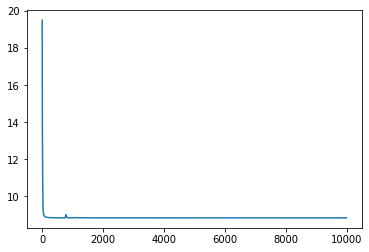

In [160]:
import matplotlib.pyplot as plt
plt.plot(cnt_history,loss_history)
plt.show()

In [135]:
len(cnt_history)

100